In [21]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import numpy as np
import visualkeras as vk # pip install visualkeras
import pandas as pd
import seaborn as sn
from tensorflow.keras import layers
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
train_data = np.load("/content/drive/MyDrive/htr/numpykg/train_data.npy")
test_data = np.load("/content/drive/MyDrive/htr/numpykg/test_data.npy")
train_labels = np.load("/content/drive/MyDrive/htr/numpykg/train_labels.npy")
test_labels = np.load("/content/drive/MyDrive/htr/numpykg/test_labels.npy")

In [ ]:
# model = Sequential()

# model.add(Conv2D(32, (5, 5), input_shape=(50, 50, 1), activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (5, 5), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.25))

# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(256, activation="relu"))
# model.add(Dense(36, activation="softmax"))

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.summary()


model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(50, 50, 1), activation=layers.LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation=layers.LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation=layers.LeakyReLU(alpha=0.2)))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_21 (Conv2D)          (None, 42, 42, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 42, 42, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                      

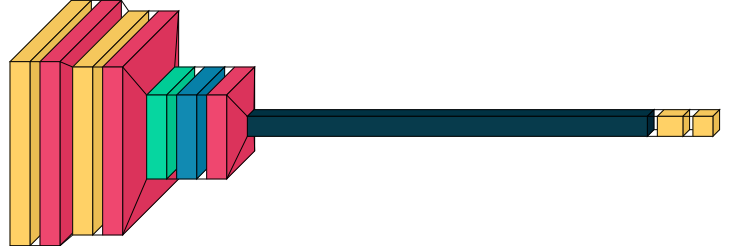

In [ ]:
vk.layered_view(model)

In [27]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.1 MB/s eta 0:00:00


In [30]:
from tensorflow import keras
from tensorflow.keras import layers
# import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split

In [31]:
model = keras.Sequential(
    [
        keras.Input(shape=[*(50,50), 1]),
        layers.Conv2D(32, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.2)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.2)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(128, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.2)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.2)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.4),
        layers.Flatten(),
     
        # layers.Dense(1024, activation="relu"),
        layers.Dense(1024, activation=layers.LeakyReLU(alpha=0.2)),
        layers.Dense(512, activation=layers.LeakyReLU(alpha=0.2)),
        layers.Dense(256, activation=layers.LeakyReLU(alpha=0.2)),
        layers.Dense(128, activation=layers.LeakyReLU(alpha=0.2)),

        layers.Dense(36, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 9, 9, 128)        

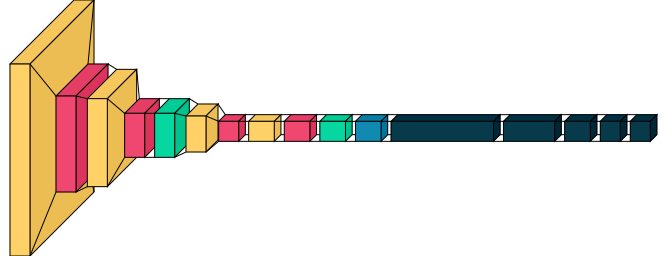

In [32]:
vk.layered_view(model)

In [ ]:
#AlexNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# define the model
model = Sequential()

# add convolutional layers
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# add dense layers
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=36, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# train the model
# model.fit(train_data,train_labels,validation_data=(train_data,train_labels), batch_size=64, epochs=10)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(50, 50, 1), kernel_size=(11,11), strides=(4,4), padding="valid", activation="relu"))
# 1st Pooling layer
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu"))
# 2nd Pooling Layer
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
# 3rd Pooling Layer
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# Flattening the Layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(50, 50, 1), activation="relu"))
model.add(Dropout(0.4))
# 2nd Dense Layer
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(36, activation="softmax"))
# Model Summary
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 10, 10, 96)        11712     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 384)         885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 1, 384)        

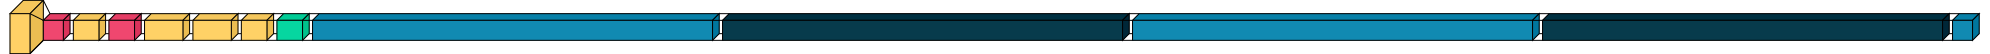

In [ ]:
vk.layered_view(model)

In [ ]:
#loss is the error evaluated during training a model, val_loss is the error during validation.
best_loss_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/htr/models/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/htr/models/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min"
)

In [33]:
# step = tf.Variable(0, trainable=False)
# schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
#     [10000, 15000], [1e-0, 1e-1, 1e-2])
# # lr and wd can be a function or a tensor
# lr = 1e-1 * schedule(step)
# wd = lambda: 1e-4 * schedule(step)

# model.compile(
#     loss="categorical_crossentropy", 
#     optimizer=tfa.optimizers.AdamW(weight_decay=wd),
#     metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=1, 
    batch_size=32, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

2006/2006 [==============================] - 425s 211ms/step - loss: 1.3175 - accuracy: 0.6022 - val_loss: 0.3510 - val_accuracy: 0.8917


In [ ]:
# 2 !pip install tensorflow==2.9.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

In [34]:
model.save("/content/drive/MyDrive/htr/models/model2.h5")

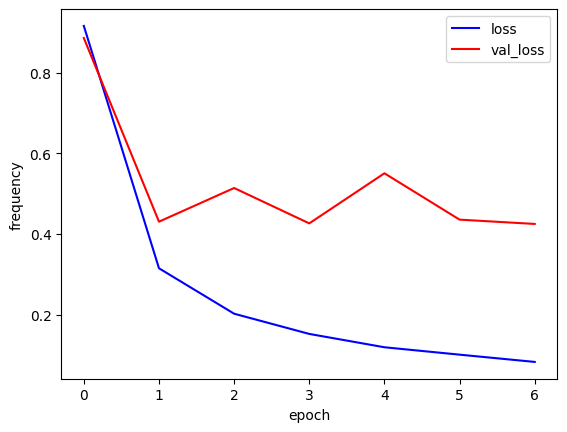

In [ ]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

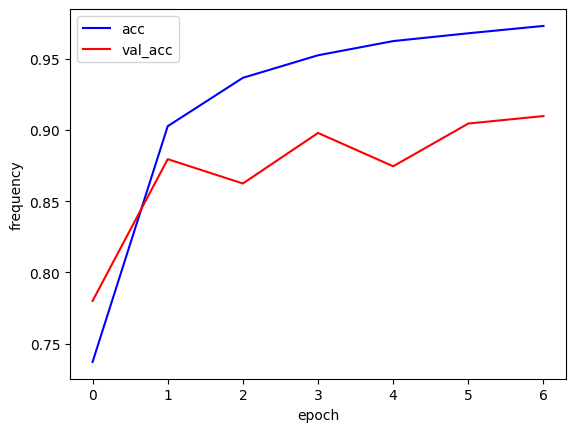

In [ ]:
plt.plot(history.history["accuracy"], 'b', label="acc")
plt.plot(history.history["val_accuracy"], 'r', label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [ ]:
model.load_weights("/content/drive/MyDrive/htr/models/best_val_loss_model1.h5")

In [ ]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

502/502 [==============================] - 51s 101ms/step - loss: 0.4250 - accuracy: 0.9097
0.42497625946998596 0.9097425937652588


In [ ]:
predictions = model.predict(test_data)

502/502 [==============================] - 51s 102ms/step


In [ ]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[332   0   0 ...   0   0  15]
 [  0 380   1 ...   0   0   0]
 [  0   0 397 ...   0   4   1]
 ...
 [  0   0   0 ... 414   0   1]
 [  0   0   0 ...   0 395   0]
 [  0   0   0 ...   1   0 388]]


<Axes: xlabel='predicted', ylabel='actual'>

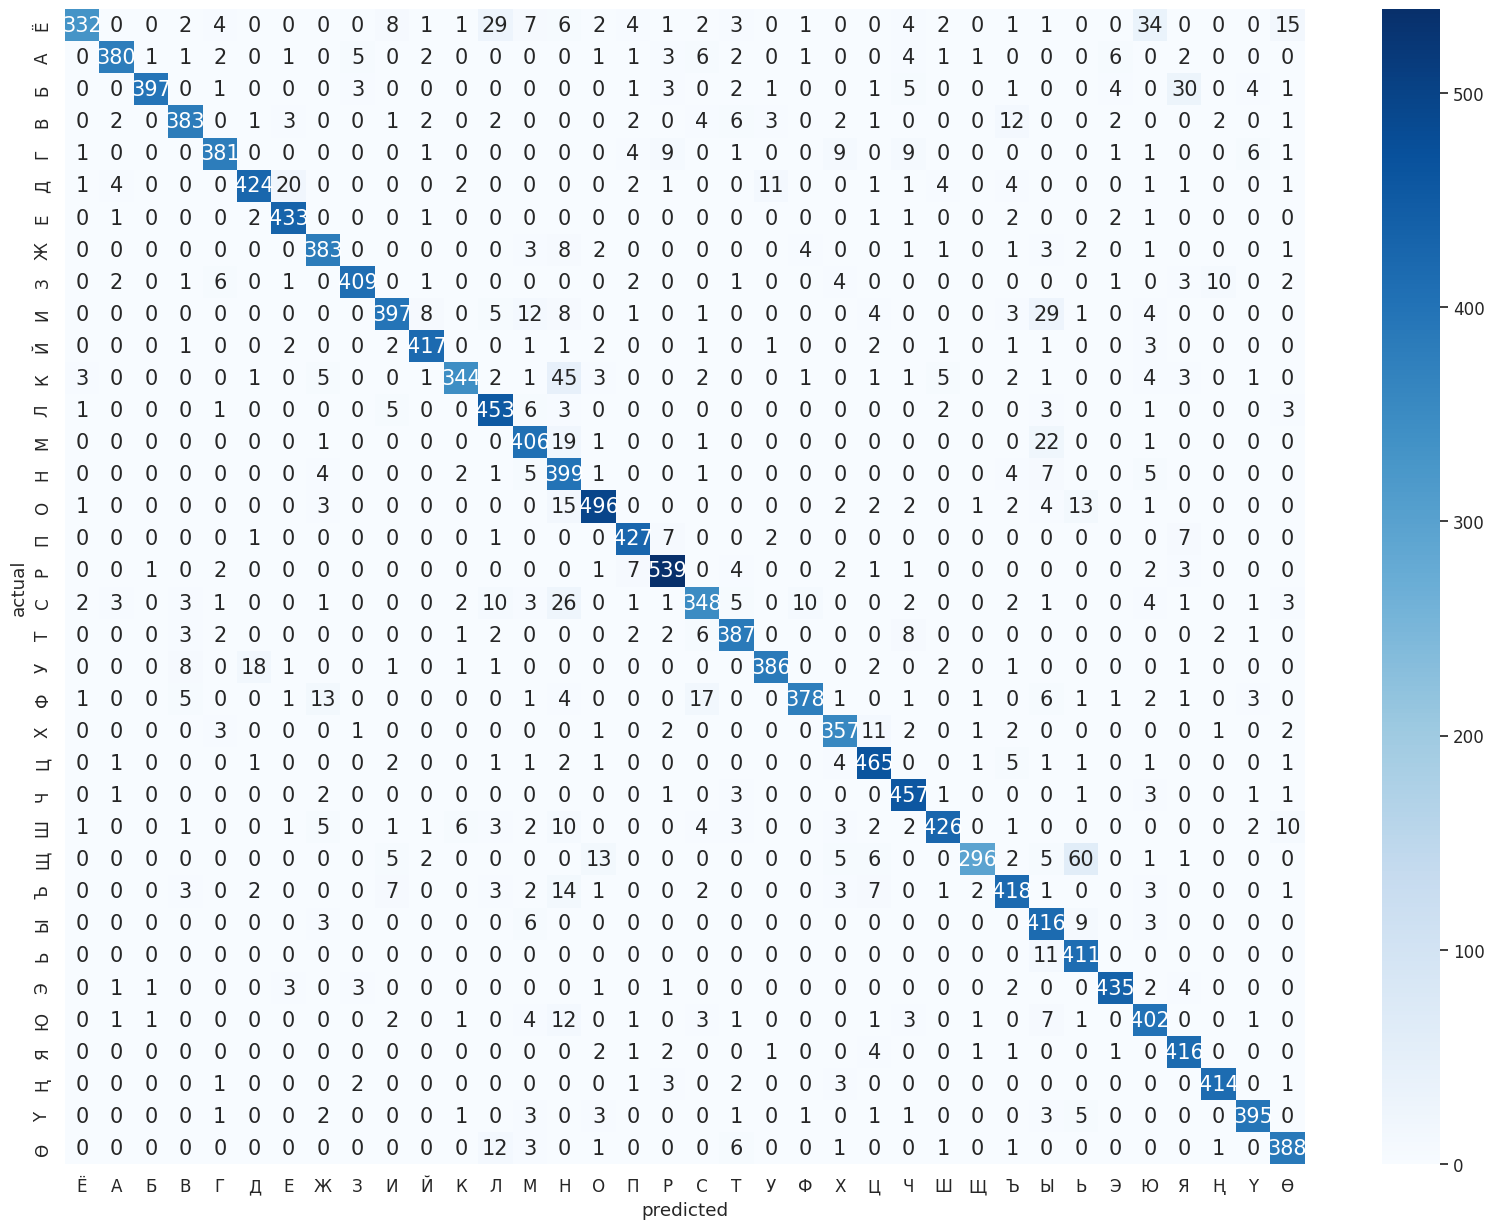

In [ ]:
labels = ['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'Ң','О','Ө', 'П', 'Р', 'С', 'Т', 'У', 'Ү', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.1) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")